

---



---


#ASSIGNMENT 5(NLP)


> Aaditya Bhatnagar


> COE11


> Roll No.: 102003267


---



---









##Ques 1

In [3]:
import gensim.downloader as api
wv=api.load('word2vec-google-news-300')

[=================================================-] 100.0% 1662.5/1662.8MB downloaded


In [2]:
for index,word in enumerate(wv.index_to_key):
  if(index==10):#for taking only 10 words
    break
  print(index,word)

0 </s>
1 in
2 for
3 that
4 is
5 on
6 ##
7 The
8 with
9 said


In [3]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
def display(model,word):
  similar=model.most_similar(positive=[word],topn=10)#cosine similarity
  disimilar=model.most_similar(negative=[word],topn=5)#very low similarity

  similar_list=['car']
  for s in similar:
    similar_list.append(s[0])

  word_vector=np.array([model[w] for w in similar_list])
  twodims_similar=PCA(n_components=2).fit_transform(word_vector)
  plt.figure(figsize=(6,6))
  plt.scatter(twodims_similar[:,0],twodims_similar[:,1],c='g')

  for word,(x,y) in zip(similar_list,twodims_similar):
    plt.annotate(word,(x,y),xytext=(x+0.05,y+0.05))

#--------------------------------------------------------------------------------
  disimilar_list=[]
  for d in disimilar:
    disimilar_list.append(d[0])
  
  word_vector_disimilar=np.array([model[w] for w in disimilar_list])
  twodims_disimilar=PCA(n_components=2).fit_transform(word_vector_disimilar)
  plt.scatter(twodims_disimilar[:,0],twodims_disimilar[:,1],c='r')
  for word,(x,y) in zip(disimilar_list,twodims_disimilar):
    plt.annotate(word,(x,y),xytext=(x+0.05,y+0.05))




> word2vec-google-news-300 model



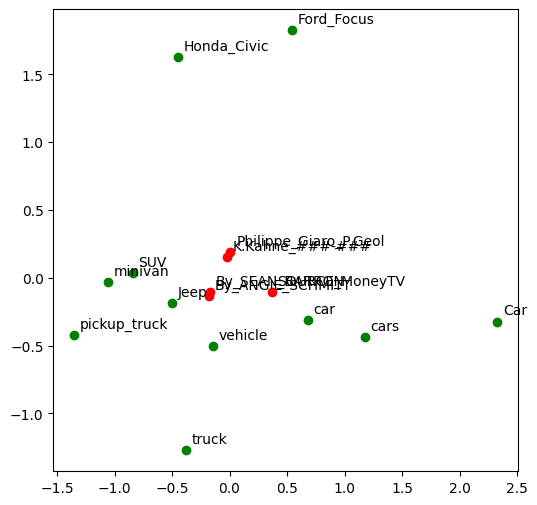

In [4]:
display(wv,'car')



> glove-wiki-gigaword-300 model



In [5]:
wv2=api.load("glove-wiki-gigaword-300")

[==================================================] 100.0% 376.1/376.1MB downloaded


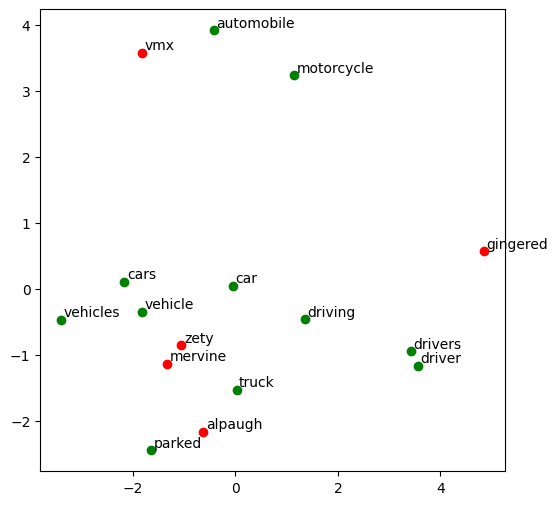

In [6]:
display(wv2,'car')



> glove-twitter-200 model


In [7]:
wv3=api.load("glove-twitter-200")

[=================================================-] 99.9% 757.6/758.5MB downloaded


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12431 (\N{HIRAGANA LETTER WA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12363 (\N{HIRAGANA LETTER KA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12425 (\N{HIRAGANA LETTER RA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12356 (\N{HIRAGANA LETTER I}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  func(*a

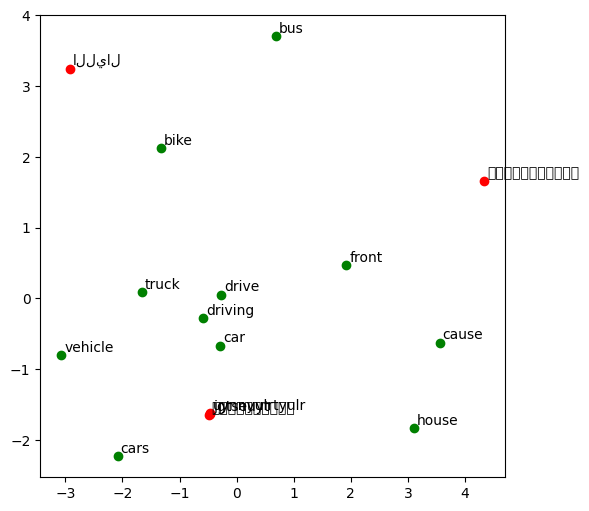

In [8]:
display(wv3,'car')



> fasttext-wiki-news-subwords-300 model



In [9]:
wv4=api.load("fasttext-wiki-news-subwords-300")

[=================================================-] 100.0% 958.0/958.4MB downloaded


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 4172 (\N{MYANMAR SYMBOL LOCATIVE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2441 (\N{BENGALI LETTER U}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Matplotlib currently does not support Bengali natively.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2472 (\N{BENGALI LETTER NA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3093 (\N{TELUGU LETTER KA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Matplotlib currently does not support Telugu natively.
  func(*args, **kwargs)
/usr/local/li

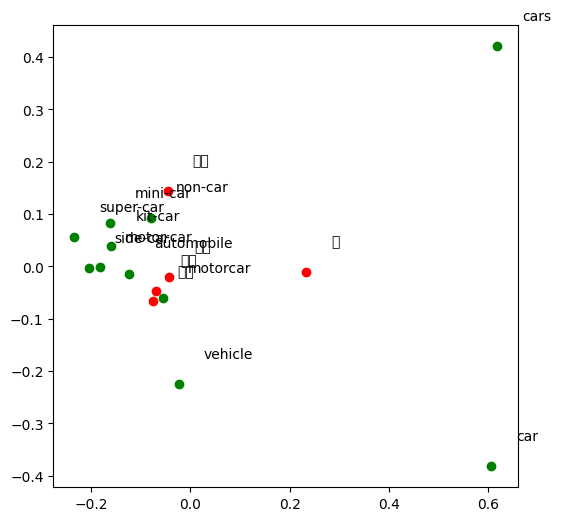

In [10]:
display(wv4,'car')

##Ques 2



###(1) Word similarity task


In [11]:
import pandas as pd





> wordsim353 dataset





In [12]:
df=pd.read_csv("/content/drive/MyDrive/datasets/word vectors/wordsim353.csv")

In [13]:
df.head()

,Word_1,Word_2,score
0,love,sex,6.77
1,tiger,cat,7.35
2,tiger,tiger,10.00
3,book,paper,7.46
4,computer,keyboard,7.62


In [14]:
def similarity(model,df):
  sim=[]
  pop_ind=[]
  for i in range(len(df)):
    a=df['Word_1'][i]
    b=df['Word_2'][i]
    if((a in model.key_to_index) and (b in model.key_to_index)):
      sim.append(model.similarity(a,b))
    else:
      pop_ind.append(i)
  
  for index in sorted(pop_ind, reverse=True):
    del human_scores[index]
  return sim

In [15]:
human_scores=df['score'].tolist()

In [16]:
import scipy
#word2vec-google-news-300 model
human_scores=df['score'].tolist()
scipy.stats.spearmanr(human_scores,similarity(wv,df))

SignificanceResult(statistic=0.7000166486272194, pvalue=2.86866666051422e-53)

In [17]:
#glove-wiki-gigaword-300 model
human_scores=df['score'].tolist()
scipy.stats.spearmanr(human_scores,similarity(wv2,df))

SignificanceResult(statistic=0.6012399204581493, pvalue=2.6276604502046066e-34)

In [18]:
#glove-twitter-200 model
human_scores=df['score'].tolist()
scipy.stats.spearmanr(human_scores,similarity(wv3,df))

SignificanceResult(statistic=0.5337683031701267, pvalue=5.426307264834045e-26)

In [19]:
#fasttext-wiki-news-subwords-300 model
human_scores=df['score'].tolist()
scipy.stats.spearmanr(human_scores,similarity(wv4,df))

SignificanceResult(statistic=0.6943215016552395, pvalue=4.353713719436137e-52)



> Rare words dataset



In [20]:
df2=pd.read_csv("/content/drive/MyDrive/datasets/word vectors/rare_words.csv")

In [21]:
df2.head()

,word1,word2,similarity
0,squishing,squirt,5.88
1,undated,undatable,5.83
2,circumvents,beat,5.33
3,circumvents,ebb,3.25
4,dispossess,deprive,6.83


In [22]:
human_scores_rare_words=df2['similarity'].tolist()

In [23]:
def similarity_rare(model,df):
  sim=[]
  pop_ind=[]
  for i in range(len(df)):
    a=df['word1'][i]
    b=df['word2'][i]
    if((a in model.key_to_index) and (b in model.key_to_index)):
      sim.append(model.similarity(a,b))
    else:
      pop_ind.append(i)

  for index in sorted(pop_ind, reverse=True):#to remove scores of extra words not present in current model
    del human_scores_rare_words[index]

  return sim

In [24]:
#word2vec-google-news-300 model
human_scores_rare_words=df2['similarity'].tolist()
scipy.stats.spearmanr(human_scores_rare_words,similarity_rare(wv,df2))

SignificanceResult(statistic=0.5342097582319317, pvalue=3.409254222298205e-135)

In [25]:
#glove-wiki-gigaword-300 model
human_scores_rare_words=df2['similarity'].tolist()

scipy.stats.spearmanr(human_scores_rare_words,similarity_rare(wv2,df2))

SignificanceResult(statistic=0.41177197601400173, pvalue=7.0301583227906354e-74)

In [26]:
#glove-twitter-200 model
human_scores_rare_words=df2['similarity'].tolist()

scipy.stats.spearmanr(human_scores_rare_words,similarity_rare(wv3,df2))

SignificanceResult(statistic=0.32595695996783447, pvalue=9.84229874236794e-28)

In [27]:
#fasttext-wiki-news-subwords-300 model
human_scores_rare_words=df2['similarity'].tolist()

scipy.stats.spearmanr(human_scores_rare_words,similarity_rare(wv4,df2))

SignificanceResult(statistic=0.5382314083884947, pvalue=4.403931443765452e-148)

###(2) Word Analogy task

In [28]:
df3=pd.read_csv("/content/drive/MyDrive/datasets/word vectors/Analogy.csv")

In [29]:
df3.head()

,word1,word2,word3,word4
0,Athens,Greece,Baghdad,Iraq
1,Athens,Greece,Bangkok,Thailand
2,Athens,Greece,Beijing,China
3,Athens,Greece,Berlin,Germany
4,Athens,Greece,Bern,Switzerland


In [30]:
def analogy(model,df):
  answer=[]
  for i in range(100):
    a=df['word1'][i]
    b=df['word2'][i]
    c=df['word3'][i]
    if ((a in model.key_to_index) and (b in model.key_to_index) and (c in model.key_to_index)):
      result=model.most_similar(positive=[b,c],negative=[a])
      #result=wv.most_similar([wv_new],topn=1)
      answer.append(result[0][0])
    else:
      answer.append(0)

  count=0
  count1=0
  for i in range(len(answer)):
    if(answer[i]!=0):
      count=count+1
      if (answer[i]==df['word4'][i]):
        count1=count1+1
  print(count,count1)
  print(count1/count)  
  print(answer)


In [31]:
analogy(wv,df3)

100 81
0.81
['Iraqi', 'Thailand', 'China', 'Germany', 'Switzerland', 'Egypt', 'Australia', 'Viet_Nam', 'Cuba', 'Finland', 'Pakistan', 'Afghan', 'Britain', 'Spain', 'Russia', 'Norway', 'Canada', 'France', 'Italy', 'Sweden', 'Iran', 'Japan', 'Thailand', 'China', 'Germany', 'coach_Bobby_Curlings', 'Egypt', 'Mr_Rudd', 'Vietnam', 'Cuba', 'Finland', 'Pakistan', 'Afghanistan', 'Britain', 'Spain', 'Russia', 'Norway', 'Prime_Minister_Jean_Chrétien', 'France', 'Italy', 'Sweden', 'Iran', 'Japan', 'Greece', 'China', 'Germany', 'Switzerland', 'Egypt', 'Australia', 'Viet_Nam', 'Cuba', 'Finland', 'Pakistan', 'Afghanistan', 'Britain', 'Spain', 'Russia', 'Norway', 'Canada', 'France', 'Italy', 'Sweden', 'Iran', 'Japan', 'Greece', 'Iraqi', 'Germany', 'Bern_NC', 'Egypt', 'Australia', 'Viet_Nam', 'Cuba', 'Finland', 'Pakistan', 'Afghan', 'UK', 'Spain', 'Russia', 'Norway', 'Canada', 'France', 'Italy', 'Sweden', 'Iran', 'Japan', 'Greece', 'Mosul', 'Thailand', 'Switzerland', 'Egypt', 'Australia', 'Viet_Nam', '

In [33]:
analogy(wv4,df3)

100 99
0.99
['Iraq', 'Thailand', 'China', 'Germany', 'Switzerland', 'Egypt', 'Australia', 'Vietnam', 'Cuba', 'Finland', 'Pakistan', 'Afghanistan', 'England', 'Spain', 'Russia', 'Norway', 'Canada', 'France', 'Italy', 'Sweden', 'Iran', 'Japan', 'Thailand', 'China', 'Germany', 'Switzerland', 'Egypt', 'Australia', 'Vietnam', 'Cuba', 'Finland', 'Pakistan', 'Afghanistan', 'England', 'Spain', 'Russia', 'Norway', 'Canada', 'France', 'Italy', 'Sweden', 'Iran', 'Japan', 'Greece', 'China', 'Germany', 'Switzerland', 'Egypt', 'Australia', 'Vietnam', 'Cuba', 'Finland', 'Pakistan', 'Afghanistan', 'England', 'Spain', 'Russia', 'Norway', 'Canada', 'France', 'Italy', 'Sweden', 'Iran', 'Japan', 'Greece', 'Iraq', 'Germany', 'Berne', 'Egypt', 'Australia', 'Vietnam', 'Cuba', 'Finland', 'Pakistan', 'Afghanistan', 'England', 'Spain', 'Russia', 'Norway', 'Canada', 'France', 'Italy', 'Sweden', 'Iran', 'Japan', 'Greece', 'Iraq', 'Thailand', 'Switzerland', 'Egypt', 'Australia', 'Vietnam', 'Cuba', 'Finland', 'Paki

##Ques3

**Importing Libraries**


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import gensim
from gensim.models import Word2Vec
import gensim.downloader as api

**Loading and Exploring Data**

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/RaRe-Technologies/movie-plots-by-genre/master/data/tagged_plots_movielens.csv')

In [7]:
df.head()

,Unnamed: 0,movieId,plot,tag
0,0,1,A little boy named Andy loves to be in his roo...,animation
1,1,2,When two kids find and play a magical board ga...,fantasy
2,2,3,Things don't seem to change much in Wabasha Co...,comedy
3,3,6,Hunters and their prey--Neil and his professio...,action
4,4,7,An ugly duckling having undergone a remarkable...,romance


In [8]:
df = df.dropna()
df['plot'].apply(lambda x: len(x.split(' '))).sum()


171156

<Axes: >

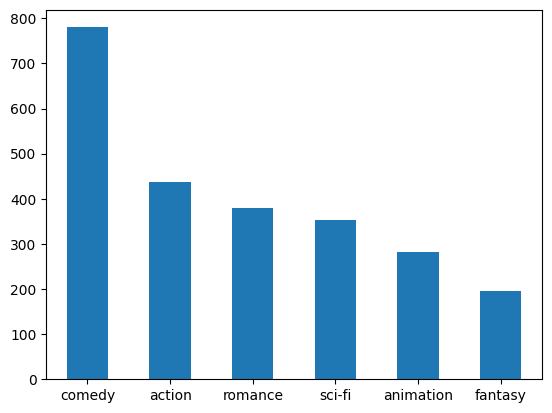

In [9]:
my_tags = ['sci-fi' , 'action', 'comedy', 'fantasy', 'animation', 'romance']
df.tag.value_counts().plot(kind="bar", rot=0)

**Train-Test Split**

In [10]:
import nltk
nltk.download('punkt')
train_data, test_data = train_test_split(df, test_size=0.1, random_state=42)

count_vectorizer = CountVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=3000) 
train_data_features = count_vectorizer.fit_transform(train_data['plot'])
print(train_data_features)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


  (0, 512)	1
  (0, 2093)	1
  (0, 2972)	1
  (0, 1691)	1
  (0, 1876)	1
  (0, 17)	4
  (0, 2697)	2
  (0, 555)	1
  (0, 344)	1
  (0, 1123)	1
  (0, 247)	1
  (0, 14)	10
  (0, 3)	5
  (0, 11)	1
  (0, 1424)	2
  (0, 12)	1
  (0, 15)	1
  (0, 535)	1
  (0, 345)	1
  (0, 2901)	1
  (0, 393)	1
  (0, 2778)	1
  (0, 594)	1
  (0, 1016)	1
  (0, 1615)	1
  :	:
  (2182, 1073)	1
  (2182, 709)	1
  (2182, 599)	1
  (2182, 200)	1
  (2182, 2939)	1
  (2182, 559)	1
  (2182, 2030)	1
  (2182, 1379)	1
  (2182, 1224)	1
  (2182, 799)	1
  (2182, 1776)	2
  (2182, 2798)	1
  (2182, 563)	1
  (2182, 1696)	1
  (2183, 17)	2
  (2183, 14)	1
  (2183, 11)	1
  (2183, 12)	1
  (2183, 1016)	1
  (2183, 1895)	2
  (2183, 979)	1
  (2183, 753)	1
  (2183, 390)	1
  (2183, 2535)	1
  (2183, 1115)	2


In [11]:
len(test_data)

243

In [12]:
wv.init_sims(replace=True)

<ipython-input-12-f2a6702beb96>:1: DeprecationWarning: Call to deprecated `init_sims` (Use fill_norms() instead. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  wv.init_sims(replace=True)


In [13]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(train_data_features, train_data['tag'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
#Testing
test_features=count_vectorizer.transform(test_data['plot'])
predictions=logreg.predict(test_features)
target=test_data['tag']
print('accuracy %s' % accuracy_score(target, predictions))
cm = confusion_matrix(target, predictions)
print('confusion matrix\n %s' % cm)

accuracy 0.448559670781893
confusion matrix
 [[23  1 11  0  3  4]
 [ 4 11  9  1  3  3]
 [11  7 50  3 15  0]
 [ 5  4  1  3  2  1]
 [ 1  3 17  1 10  3]
 [ 9  5  5  2  0 12]]


In [15]:
tf_vect = TfidfVectorizer(
    tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english',max_features=3000)
train_data_features = tf_vect.fit_transform(train_data['plot'])

logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(train_data_features, train_data['tag'])
#Testing
test_features=tf_vect.transform(test_data['plot'])
predictions=logreg.predict(test_features)
target=test_data['tag']
print('accuracy %s' % accuracy_score(target, predictions))
cm = confusion_matrix(target, predictions)
print('confusion matrix\n %s' % cm)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy 0.4609053497942387
confusion matrix
 [[23  2 11  0  3  3]
 [ 6 10  9  1  3  2]
 [ 7  7 51  3 17  1]
 [ 4  4  1  3  3  1]
 [ 1  3 16  1 11  3]
 [ 9  3  5  2  0 14]]


In [16]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
test_tokenized = test_data.apply(lambda r: w2v_tokenize_text(str(r['plot'])), axis=1).values
train_tokenized = train_data.apply(lambda r: w2v_tokenize_text(str(r['plot'])), axis=1).values

In [19]:
train_tokenized

array([list(['Turkish', 'and', 'his', 'close', 'friend/accomplice', 'Tommy', 'get', 'pulled', 'into', 'the', 'world', 'of', 'match', 'fixing', 'by', 'the', 'notorious', 'Brick', 'Top', 'Things', 'get', 'complicated', 'when', 'the', 'boxer', 'they', 'had', 'lined', 'up', 'gets', 'badly', 'beaten', 'by', 'Pitt', "'pikey", 'slang', 'for', 'an', 'Irish', 'Gypsy', 'who', 'comes', 'into', 'the', 'equation', 'after', 'Turkish', 'an', 'unlicensed', 'boxing', 'promoter', 'wants', 'to', 'buy', 'caravan', 'off', 'the', 'Irish', 'Gypsies', 'They', 'then', 'try', 'to', 'convince', 'Pitt', 'not', 'only', 'to', 'fight', 'for', 'them', 'but', 'to', 'lose', 'for', 'them', 'too', 'Whilst', 'all', 'this', 'is', 'going', 'on', 'huge', 'diamond', 'heist', 'takes', 'place', 'and', 'fistful', 'of', 'motley', 'characters', 'enter', 'the', 'story', 'including', "'Cousin", 'Avi', "'Boris", 'The', 'Blade', "'Franky", 'Four', 'Fingers', 'and', "'Bullet", 'Tooth', 'Tony', 'Things', 'go', 'from', 'bad', 'to', 'wors

In [26]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.index_to_key:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.layer1_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, review) for review in text_list ])

In [ ]:
X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

In [ ]:
logreg = LogisticRegression(n_jobs=1, C=1e5)

logreg = logreg.fit(X_train_word_average, train_data['tag'])
predicted = logreg.predict(X_test_word_average)

In [ ]:
target=test_data['tag']
print('accuracy %s' % accuracy_score(target, predicted))
cm = confusion_matrix(target, predicted)
print('confusion matrix\n %s' % cm)